# Importando as libs

In [275]:
!pip install pandasql

In [310]:
import pandas as pd
from pandasql import sqldf
from datetime import datetime
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

# Leitura dos arquivos

In [474]:
#Tabela Customers
df_customers = pd.read_csv("Customers.csv")

#Tabela Events
df_events = pd.read_csv("Events.csv")

#Tabela Transactions
df_transactions = pd.read_csv("Transactions.csv")

# Tabela Customers

In [312]:
df_customers.head()

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance
0,60a7d0011363ea0011d0eb80,192260,601.525833,2021-06-10 21:23:31,100.013269,5,0,250.0,3000.0,14,22.22
1,60c77e1ffdaebd001875353e,192853,1798.831206,2021-06-14 16:13:56,300.048411,2,0,8000.0,180000.0,35,77.78
2,588f45ae0a760bb65b380afa,11897,1621.043680,2017-09-14 12:08:06,2500.000000,13,2,4500.0,0.0,32,17.00
3,5915d73623d4b1881694e11e,12583,78643.814178,2017-09-25 15:44:40,2005.000000,37,7,18000.0,120000.0,34,69.17
4,591f5f3b3daa47c6488bce3f,5564,422.691159,2017-05-22 18:38:05,2000.000000,23,7,2000.0,45000.0,29,0.00


In [452]:
df_customers['CustomerId'].value_counts().sum()

1000

In [454]:
df_transactions['CustomerId'].value_counts().sum()

1000

In [313]:
#Verificando linhas e colunas
df_customers.shape

(1000, 11)

In [314]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerApiid              1000 non-null   object 
 1   CustomerId                 1000 non-null   int64  
 2   AUM                        1000 non-null   float64
 3   RegisterDate               1000 non-null   object 
 4   AmountFirstDeposit         1000 non-null   float64
 5   TotalDeposits              1000 non-null   int64  
 6   TotalWithdrawals           1000 non-null   int64  
 7   MonthlyIncome              1000 non-null   float64
 8   FinancialInvestmentsValue  1000 non-null   float64
 9   Age                        1000 non-null   int64  
 10  ComputedRiskTolerance      1000 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 86.1+ KB


##### A tabela Customers não contém dados nulos

In [315]:
df_customers.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,1000.0,113653.852000,55113.274917,44.0,69583.000000,123887.500000,161280.000000,1.976300e+05
AUM,1000.0,91684.637534,731956.818917,0.0,100.012157,3877.396861,21399.469655,1.509724e+07
AmountFirstDeposit,1000.0,25710.737689,273690.796700,1.0,120.000000,847.944318,4849.750000,8.000373e+06
TotalDeposits,1000.0,18.876000,24.280283,1.0,4.000000,11.000000,23.250000,2.240000e+02
TotalWithdrawals,1000.0,3.735000,6.583017,0.0,0.000000,1.500000,5.000000,8.600000e+01
MonthlyIncome,1000.0,32588.987080,513055.898063,0.0,2000.000000,4000.000000,8000.000000,1.500000e+07
FinancialInvestmentsValue,1000.0,117110.857000,577946.534151,0.0,0.000000,1000.000000,30000.000000,1.100000e+07
Age,1000.0,33.492000,11.302641,0.0,26.000000,31.000000,38.000000,9.000000e+01
ComputedRiskTolerance,1000.0,24.072160,15.301873,0.0,14.000000,20.000000,27.000000,9.630000e+01


In [316]:
df_customers.head()

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance
0,60a7d0011363ea0011d0eb80,192260,601.525833,2021-06-10 21:23:31,100.013269,5,0,250.0,3000.0,14,22.22
1,60c77e1ffdaebd001875353e,192853,1798.831206,2021-06-14 16:13:56,300.048411,2,0,8000.0,180000.0,35,77.78
2,588f45ae0a760bb65b380afa,11897,1621.043680,2017-09-14 12:08:06,2500.000000,13,2,4500.0,0.0,32,17.00
3,5915d73623d4b1881694e11e,12583,78643.814178,2017-09-25 15:44:40,2005.000000,37,7,18000.0,120000.0,34,69.17
4,591f5f3b3daa47c6488bce3f,5564,422.691159,2017-05-22 18:38:05,2000.000000,23,7,2000.0,45000.0,29,0.00


In [317]:
#Convertendo a coluna de 'RegisterDate' para datetime

df_customers['RegisterDate'] = pd.to_datetime(df_customers['RegisterDate'], format='%Y-%m-%d %H:%M:%S')
print(df_customers.dtypes)

CustomerApiid                        object
CustomerId                            int64
AUM                                 float64
RegisterDate                 datetime64[ns]
AmountFirstDeposit                  float64
TotalDeposits                         int64
TotalWithdrawals                      int64
MonthlyIncome                       float64
FinancialInvestmentsValue           float64
Age                                   int64
ComputedRiskTolerance               float64
dtype: object


In [ ]:
#Convertendo a coluna de 'AUM' para int


df_customers['AUM'] = df_customers['AUM'].astype(int)

# Tabela Events

In [318]:
df_events.head()

,EventDate,Platform,CustomerApiid
0,20210112,IOS,5eb045b00d281d0010993b19
1,20210112,IOS,5d54036d7a4e2a00129ac685
2,20210112,IOS,5f160ad08df61f00175d4a94
3,20210112,IOS,5e1f7e25a6a96a0010ee1545
4,20210112,IOS,5e66a9a9e7bbca00119eb5fc


In [319]:
df_events.shape

(1000, 3)

In [320]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EventDate      1000 non-null   int64 
 1   Platform       1000 non-null   object
 2   CustomerApiid  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [321]:
#Convertendo a coluna de 'EventDate' para datetime

df_events['EventDate'] = pd.to_datetime(df_events['EventDate'], format='%Y%m%d')
print(df_events.dtypes)

EventDate        datetime64[ns]
Platform                 object
CustomerApiid            object
dtype: object


# Tabela Transactions

In [497]:
df_transactions = pd.read_csv("Transactions.csv")

In [499]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 260 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          1000 non-null   int64  
 1   Direction   1000 non-null   int64  
 2   Amount      1000 non-null   float64
 3   CustomerId  1000 non-null   int64  
 4   OperatedAt  1000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 46.9+ KB


In [534]:
df_transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1000.0,1.180722e+06,73083.958545,456538.0,1.192801e+06,1199063.5,1201338.25,1.201975e+06
Direction,1000.0,1.188000e+01,3.909077,10.0,1.000000e+01,10.0,10.00,2.000000e+01
Amount,1000.0,2.357222e+03,9808.965386,1.0,1.695555e+02,500.0,1200.00,1.579400e+05
CustomerId,1000.0,9.357191e+04,48098.081659,22.0,5.196000e+04,101758.5,136931.25,1.614100e+05
Month,1000.0,1.143000e+00,0.705016,1.0,1.000000e+00,1.0,1.00,7.000000e+00
Year,1000.0,2.021000e+03,0.000000,2021.0,2.021000e+03,2021.0,2021.00,2.021000e+03


#### A trabela Transactions possui registros apenas do ano de 2021 entre os meses de janeiro (01)  a julho (07)

In [500]:
#Convertendo a coluna de 'OperatedAt' para datetime

df_transactions['OperatedAt'] = pd.to_datetime(df_transactions['OperatedAt'], format='%Y-%m-%d %H:%M:%S')
print(df_transactions.dtypes)

Id                     int64
Direction              int64
Amount               float64
CustomerId             int64
OperatedAt    datetime64[ns]
dtype: object


In [501]:
#Criando a coluna Month para guardar o registro de mês
df_transactions['Month'] = pd.to_datetime(df_transactions['OperatedAt']).dt.month


#Criando a coluna Year para guardar o registro de ano
df_transactions['Year'] = pd.to_datetime(df_transactions['OperatedAt']).dt.year

#Ordenando as transações por data
df_transactions.sort_values(by=['Month', 'Year'], inplace=True, ascending=True)
df_transactions.head()

,Id,Direction,Amount,CustomerId,OperatedAt,Month,Year
260,1193306,10,12800.00,12431,2021-01-01 00:00:30,1,2021
573,1200034,10,20000.00,117985,2021-01-01 00:01:33,1,2021
452,1198402,10,50.00,95724,2021-01-01 00:02:08,1,2021
521,1199295,10,200.00,136323,2021-01-01 00:02:35,1,2021
486,1198878,10,2000.00,138207,2021-01-01 00:02:58,1,2021
442,1198295,10,300.00,116255,2021-01-01 00:04:00,1,2021
346,1195804,10,100.00,16655,2021-01-01 00:04:16,1,2021
467,1198751,10,600.00,86678,2021-01-01 00:04:44,1,2021
408,1197389,10,6000.00,39685,2021-01-01 00:05:36,1,2021
555,1199823,10,50.00,148881,2021-01-01 00:05:41,1,2021


### Montante de Saídas

In [536]:
df_out = df_transactions[df_transactions['Direction'] == 20]
print(df_out['Amount'].sum().round(2))

867867.13


###### O montante de saídas em 2021 foi de 867.867,13
###### - Esse valor está em real?

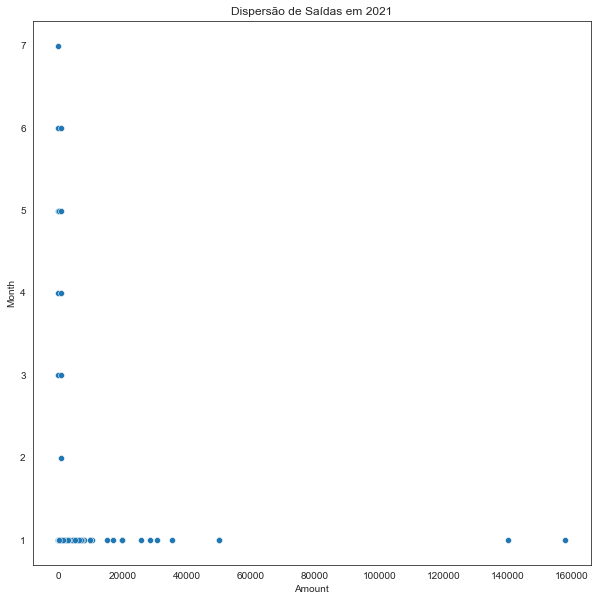

In [525]:
# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(10, 10))
plt.title('Dispersão de Saídas em 2021')

# Gráfico de Dispersão
g = sns.scatterplot(x="Amount", y="Month", 
                    data=df_out)
plt.show()

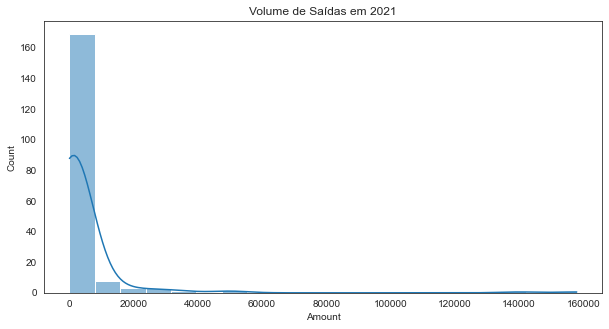

In [546]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_out, x='Amount', bins=20, kde=True)
plt.title('Volume de Saídas em 2021')
plt.show()

#### Nota-se que não houve retiradas de grandes volumes no ano de 2021, contudo há registros de saídas com valores acima de 20.000

## Montante de Entradas


In [537]:
df_in = df_transactions[df_transactions['Direction'] == 10]
print(df_in['Amount'].sum().round(2))

1489354.96


###### O montante de saídas em 2021 foi de 1.489.354,96
###### - Esse valor está em real?

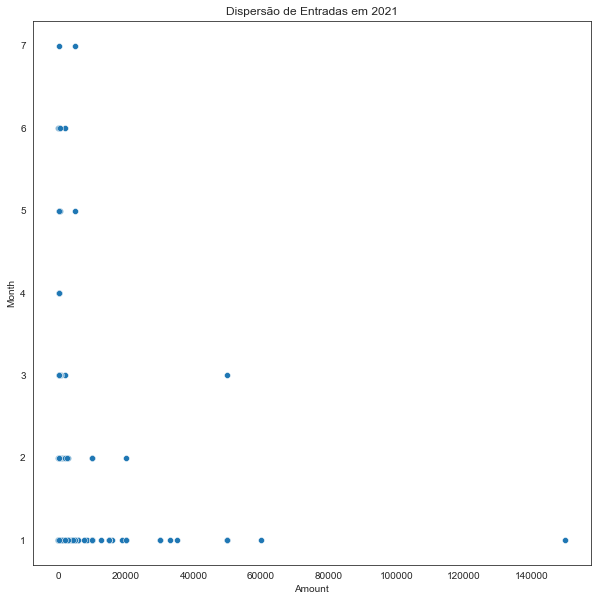

In [539]:
# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(10, 10))
plt.title('Dispersão de Entradas em 2021')

# Gráfico de Dispersão
g = sns.scatterplot(x="Amount", y="Month", 
                    data=df_in)
plt.show()

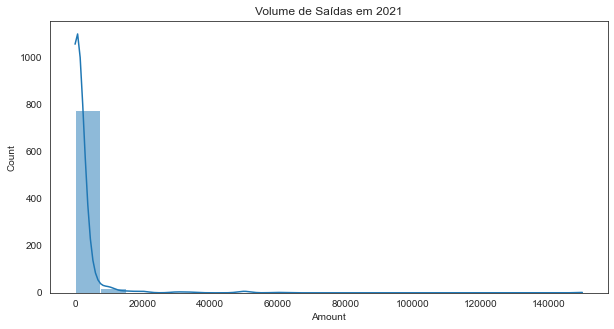

In [548]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_in, x='Amount', bins=20, kde=True)
plt.title('Volume de Saídas em 2021')
plt.show()

___

In [550]:
df_in.head(2)

,Id,Direction,Amount,CustomerId,OperatedAt,Month,Year
260,1193306,10,12800.0,12431,2021-01-01 00:00:30,1,2021
573,1200034,10,20000.0,117985,2021-01-01 00:01:33,1,2021


___


# Perfil Público

In [553]:
#Tabela Customers
df_customers = pd.read_csv("Customers.csv")
df_customers.head()

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance
0,60a7d0011363ea0011d0eb80,192260,601.525833,2021-06-10 21:23:31,100.013269,5,0,250.0,3000.0,14,22.22
1,60c77e1ffdaebd001875353e,192853,1798.831206,2021-06-14 16:13:56,300.048411,2,0,8000.0,180000.0,35,77.78
2,588f45ae0a760bb65b380afa,11897,1621.043680,2017-09-14 12:08:06,2500.000000,13,2,4500.0,0.0,32,17.00
3,5915d73623d4b1881694e11e,12583,78643.814178,2017-09-25 15:44:40,2005.000000,37,7,18000.0,120000.0,34,69.17
4,591f5f3b3daa47c6488bce3f,5564,422.691159,2017-05-22 18:38:05,2000.000000,23,7,2000.0,45000.0,29,0.00


In [555]:
df_customers['Age'].value_counts()

30    67
25    56
33    55
29    49
28    49
      ..
69     1
17     1
6      1
15     1
90     1
Name: Age, Length: 65, dtype: int64

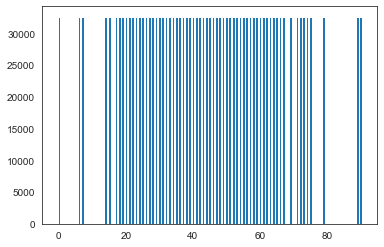

In [560]:
grupos = df_customers['Age']
valores = df_customers['MonthlyIncome'].mean()
plt.bar(grupos, valores)
plt.show()

In [565]:
!Pip install plotly
#import plotly.graph_objects as go

# PAREI A CORREÇÃO AQUI

___

# Unindo os dataframes para enriquecer a base

In [446]:
df_client['CustomerId'].value_counts().sum()

30

In [327]:
df_client = pd.merge(left = df_customers, right = df_transactions, left_on='CustomerId', right_on = 'CustomerId')

df_client.reset_index().set_index('index')
df_client.head()

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance,Id,Direction,Amount,OperatedAt
index,,,,,,,,,,,,,,,
0,597d1f93ad57cd674deb5dfd,64617,65413.030158,2019-01-02 16:58:00,200.0,22,1,8000.00,0.0,37,24.00,1201605,10,2000.000000,2021-01-04 09:31:27
1,5a04bd4815a605790aff5c77,24431,0.000000,2018-01-02 18:41:09,300.0,14,9,2000.00,0.0,22,13.50,1201889,10,100.000000,2021-01-07 00:00:00
2,5f562b1a8a70670017ab6457,147955,10841.446485,2020-09-07 12:55:00,200.0,14,0,5236.00,100.0,32,17.50,1191683,10,300.000000,2021-01-04 00:00:00
3,5b8740c9d345ed000ed4a55c,55461,17797.057930,2018-09-04 13:26:27,8000.0,32,3,20000.00,0.0,59,9.00,1189643,10,1200.000000,2021-01-04 00:00:00
4,58779257b93e5a4001f73dd5,1605,0.000000,2017-02-09 15:39:26,200.0,9,15,4021.00,0.0,31,15.00,1199301,10,400.000000,2021-01-04 00:00:00
5,5d5c0fa92ec67600101b1268,94233,15583.410122,2019-08-20 15:27:30,100.0,33,9,0.01,1450.0,25,15.00,1199147,10,500.000000,2021-01-04 00:00:00
6,5d5c0fa92ec67600101b1268,94233,15583.410122,2019-08-20 15:27:30,100.0,33,9,0.01,1450.0,25,15.00,1199156,10,500.000000,2021-01-04 00:00:00
7,5f46553c3c2f2b001775afa9,146423,21255.786848,2020-08-26 13:24:54,5000.0,23,0,5000.00,25000.0,39,24.00,1198284,10,600.000000,2021-01-04 00:00:00
8,5cad50e9e887cd001065ff77,81374,364.888763,2019-06-12 13:05:04,125.0,17,16,3000.00,0.0,33,14.00,1185127,10,142.700000,2021-01-04 00:00:00


In [328]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerApiid              30 non-null     object        
 1   CustomerId                 30 non-null     int64         
 2   AUM                        30 non-null     float64       
 3   RegisterDate               30 non-null     datetime64[ns]
 4   AmountFirstDeposit         30 non-null     float64       
 5   TotalDeposits              30 non-null     int64         
 6   TotalWithdrawals           30 non-null     int64         
 7   MonthlyIncome              30 non-null     float64       
 8   FinancialInvestmentsValue  30 non-null     float64       
 9   Age                        30 non-null     int64         
 10  ComputedRiskTolerance      30 non-null     float64       
 11  Id                         30 non-null     int64         
 12  Direction 

##### A união das tabelas Customers e Transactions a partir do identificador único do cliente ("CustomerId") resultou em uma base reduzida com apenas 30 linhas. Ao tentar outras formas de união, houve o retorno de muitos dados nulos, sendo que ao dropar, chegaríamos aos mesmos 30 registros finais.
##### Desta forma, optou-se por trabalhar com os dados resultantes da junção acima

___

### Valores de entrada por mês/ano

In [329]:
#Criando a coluna Month para guardar o registro de mês de cadastro do cliente

df_client['Month'] = pd.to_datetime(df_client['RegisterDate']).dt.month
df_client.head()


#Criando a coluna Year para guardar o registro de ano de cadastro do cliente

df_client['Year'] = pd.to_datetime(df_client['RegisterDate']).dt.year
df_client.head()

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance,Id,Direction,Amount,OperatedAt,Month,Year
0,597d1f93ad57cd674deb5dfd,64617,65413.030158,2019-01-02 16:58:00,200.0,22,1,8000.0,0.0,37,24.0,1201605,10,2000.0,2021-01-04 09:31:27,1,2019
1,5a04bd4815a605790aff5c77,24431,0.000000,2018-01-02 18:41:09,300.0,14,9,2000.0,0.0,22,13.5,1201889,10,100.0,2021-01-07 00:00:00,1,2018
2,5f562b1a8a70670017ab6457,147955,10841.446485,2020-09-07 12:55:00,200.0,14,0,5236.0,100.0,32,17.5,1191683,10,300.0,2021-01-04 00:00:00,9,2020
3,5b8740c9d345ed000ed4a55c,55461,17797.057930,2018-09-04 13:26:27,8000.0,32,3,20000.0,0.0,59,9.0,1189643,10,1200.0,2021-01-04 00:00:00,9,2018
4,58779257b93e5a4001f73dd5,1605,0.000000,2017-02-09 15:39:26,200.0,9,15,4021.0,0.0,31,15.0,1199301,10,400.0,2021-01-04 00:00:00,2,2017


In [249]:
'''
df_client2 = pd.merge(left = df_customers, right = df_events, left_on='CustomerApiid', right_on = 'CustomerApiid')
df_client2.head()
'''

"\ndf_client2 = pd.merge(left = df_customers, right = df_events, left_on='CustomerApiid', right_on = 'CustomerApiid')\ndf_client2.head()\n"

_____

In [330]:
#Agrupamento do valor de entrada por ano

df_entrada = df_client.groupby(by=["Year"]).sum('AmountFirstDeposit').reset_index()
df_entrada['AmountFirstDeposit'] = df_entrada['AmountFirstDeposit'].astype(int)
df_entrada['Year'] = df_entrada['Year'].astype(int)
df_entrada

,Year,CustomerId,AUM,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance,Id,Direction,Amount,Month
0,2017,15785,137.453072,300,40,28,4321.00,0.0,57,29.00,2399378,30,5400.000000,12
1,2018,308466,64859.001861,13900,155,35,41400.00,0.0,251,124.50,8047098,70,7610.000000,42
2,2019,593538,247404.364848,1250,183,37,28600.02,3000.0,214,122.00,8373290,70,19042.700000,41
3,2020,1925675,105487.172571,38550,311,62,15034136.00,153500.0,461,323.71,16542993,180,10096.295414,83


In [331]:
#Dropando colunas

df_entrada = df_entrada.drop(columns=['CustomerId', 'AUM', 'TotalDeposits', 'TotalWithdrawals', 'MonthlyIncome', 'Age', 'FinancialInvestmentsValue', 'ComputedRiskTolerance', 'Id', 'Direction', 'Amount', 'Month'])
df_entrada.head()

,Year,AmountFirstDeposit
0,2017,300
1,2018,13900
2,2019,1250
3,2020,38550


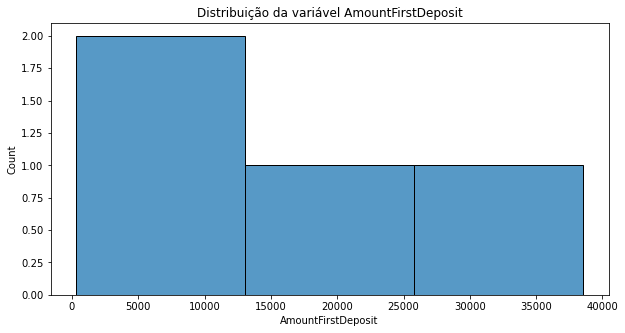

In [393]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_entrada, x="AmountFirstDeposit")
plt.title('Distribuição da variável AmountFirstDeposit')
plt.show()

___

### Total de saídas

In [437]:
df_saída = df_client[df_client['Direction'] == 20]
#df_saída = df_saída['AUM'].sum().round(2)
#print(f'o valor total de saídas é R$ {df_saída}')

In [400]:
display(df_saída)

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance,Id,Direction,Amount,OperatedAt,Month,Year
18,5f3b10d285d46700179dda7f,145424,7915,2020-08-18 11:53:53,16800.0,14,10,2500.0,17000.0,45,12.0,1200158,20,200.000000,2021-01-04 12:08:48,8,2020
19,5e17638233bb300010579f70,118701,1430,2020-01-09 18:00:03,150.0,26,9,3000.0,5000.0,67,0.0,1201803,20,720.000000,2021-01-04 12:07:05,1,2020
20,5efc7e5b5ebb81001038e9cb,139550,684,2020-07-01 21:15:52,100.0,7,1,6000.0,20000.0,30,23.5,1198365,20,1500.000000,2021-01-04 12:06:18,7,2020
22,59e04c758610ac0555c7d910,14180,137,2017-10-13 14:25:59,100.0,31,13,300.0,0.0,26,14.0,1200077,20,5000.000000,2021-01-04 12:05:18,10,2017
26,5eebd4120ab3400018e5ff9d,138305,0,2020-06-19 00:42:28,1000.0,9,2,3000.0,12000.0,30,17.5,1199276,20,3167.295414,2021-01-04 12:05:47,6,2020


In [386]:
#df_client['AUM'] = df_client['AUM'].astype(int)

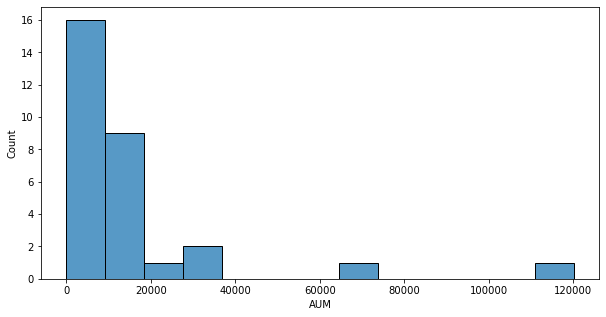

In [401]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_client, x='AUM')
plt.show()

In [203]:
'''df_saída['AmountFirstDeposit'] = df_saída['AmountFirstDeposit'].reset_index().applymap(np.int64)
df_saída'''


IndexError: invalid index to scalar variable.

In [444]:
df_saída = df_client[['Year','AUM']].groupby('Year').sum().round(2)
df_saída.reset_index(inplace = True)

#ordenar por ordem crescente
df_saída.sort_values(by = ['Year'], ascending = False, inplace = True)
df_saída


,Year,AUM
3,2020,105481
2,2019,247401
1,2018,64856
0,2017,137


In [403]:
df_client.head(2)

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance,Id,Direction,Amount,OperatedAt,Month,Year
0,597d1f93ad57cd674deb5dfd,64617,65413,2019-01-02 16:58:00,200.0,22,1,8000.0,0.0,37,24.0,1201605,10,2000.0,2021-01-04 09:31:27,1,2019
1,5a04bd4815a605790aff5c77,24431,0,2018-01-02 18:41:09,300.0,14,9,2000.0,0.0,22,13.5,1201889,10,100.0,2021-01-07 00:00:00,1,2018


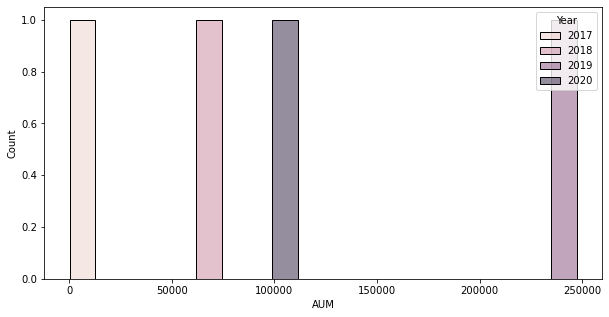

In [415]:
'''plt.figure(figsize=(10,5))
sns.histplot(data=df_saída['AUM'], x='Year')
plt.title('Saídas de Valores ao longo dos anos')
plt.show()
'''
plt.figure(figsize=(10,5))
sns.histplot(data=df_saída, x='AUM', bins=20, hue='Year')
plt.show()

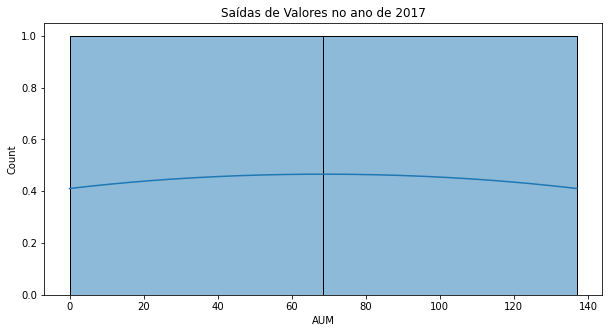

In [418]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_client[df_client['Year'] == 2017], x='AUM', kde=True)
plt.title('Saídas de Valores no ano de 2017')
plt.show()

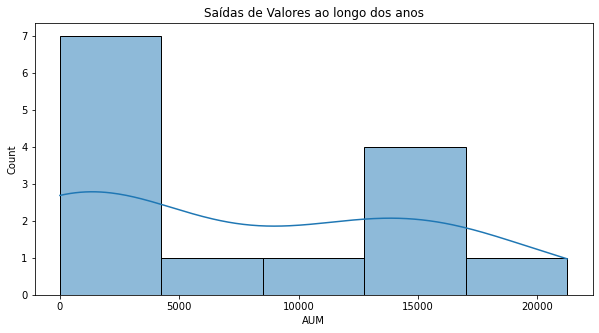

In [416]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_client[df_client['Year'] == 2020], x='AUM', kde=True)
plt.title('Saídas de Valores no ano de 2020')
plt.show()


In [436]:
df_saída.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 3 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    4 non-null      int64
 1   AUM     4 non-null      int32
dtypes: int32(1), int64(1)
memory usage: 252.0 bytes


In [435]:
'''g = sns.FacetGrid(df_saída, col="AUM", row="Year")
g.df_saída(sns.histplot, x="Year", binwidth=2, binrange=(0, 60))

'''
'''df_saída = sns.df_saída("tips")
sns.FacetGrid(tips, col="time", row="sex")'''
'''
            df_saída = sns.FacetGrid(tips, col="Year",  row="Year")
            df_saída.map(sns.scatterplot, "total_bill", "tip")'''




g = sns.FacetGrid(df_saída,col='Month')
g = g.map_dataframe(sns.barplot,"Year","AUM",hue='AUM',ci=None,palette = sns.color_palette("bright"))
for ax in g.axes.ravel():
    ax.legend()
plt.show()

KeyError: 'Month'

___

##### Qual público está entrando na warren nos últimos tempos (idade, renda, investimentos)

AttributeError: module 'matplotlib' has no attribute 'show'

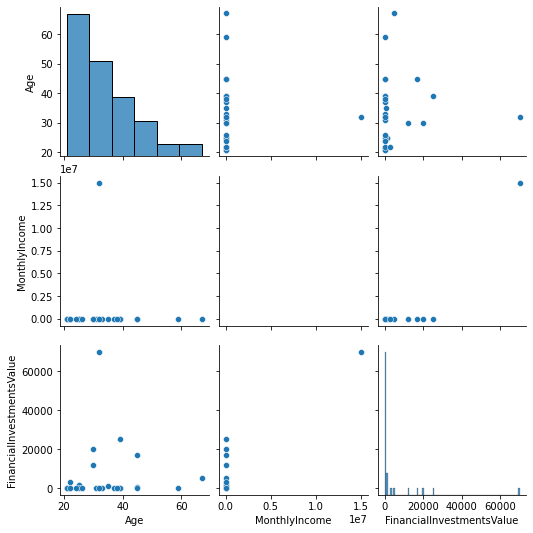

In [339]:
#gráfico de dispersão
sns.pairplot(data = df_client, vars=['Age','MonthlyIncome','FinancialInvestmentsValue'])
plt.show()

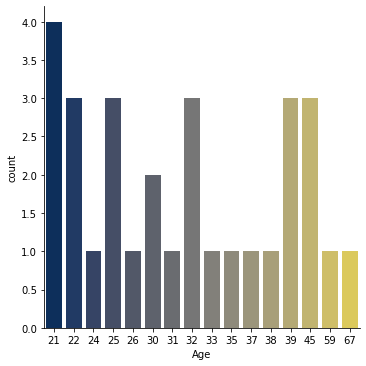

In [264]:

'''sns.catplot(x="Age", kind="count", palette='cividis', data=df_client)'''

C:\Users\re041273\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

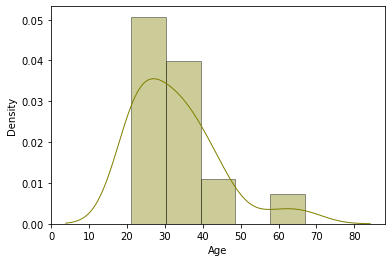

In [340]:
#Distribuição das idades
sns.distplot(df_client["Age"], hist=True, kde=True, 
             color = 'olive', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

In [360]:
#['age']['monthlyincome']['financialinvestmentvalue']

df_perfil = df_client[['Age','MonthlyIncome','FinancialInvestmentsValue']].reset_index(inplace = True)

'''ax = df_perfil.plot(x="Age", y="MonthlyIncome", kind="bar")
df.plot(x="Age", y="MonthlyIncome", kind="bar", ax=ax, color="C2")
df.plot(x="Age", y="FinancialInvestmentsValue", kind="bar", ax=ax, color="C3")

plt.show()'''


'ax = df_perfil.plot(x="Age", y="MonthlyIncome", kind="bar")\ndf.plot(x="Age", y="MonthlyIncome", kind="bar", ax=ax, color="C2")\ndf.plot(x="Age", y="FinancialInvestmentsValue", kind="bar", ax=ax, color="C3")\n\nplt.show()'

In [ ]:
df_perfil = df_client[['Month','AUM']].groupby('Month').sum().round(2)
df_saída.reset_index(inplace = True)

#ordenar por ordem crescente
df_saída.sort_values(by = ['Month'], ascending = False, inplace = True)
df_saída


In [362]:
display(df_perfil)

None

In [208]:
df_client['age'].plot.hist(bins = 20, title = 'Purchases Quantity Distribution')

KeyError: 'age'

In [ ]:
#create reference table of item code and its description
unique_indexes = data.StockCode.drop_duplicates().index
data[['StockCode','Description']].loc[unique_indexes]
ref_stock_desc = data[['StockCode','Description']].loc[unique_indexes] #the ref table
ref_stock_desc.index = range(len(ref_stock_desc)) #make index as 0,1,...

#sum groupby StockCode
df_saída = data[['StockCode','Quantity']].groupby('StockCode').sum()
df_quant_sold.reset_index(inplace = True)
#order descending
df_quant_sold.sort_values(by = ['Quantity'], ascending = False, inplace = True)
#merge
df_quant_sold = df_quant_sold.merge(ref_stock_desc, on = 'StockCode')

In [ ]:

'''
plt.figure(figsize=(10,10))
sns.histplot(data=df_transactions, x="Amount")
plt.title('Distribuição da variável AmountFirstDeposit')
plt.show()
'''

'''grupos = df_transactions['Month']
valores = df_transactions['Amount']
plt.barh(grupos, valores)
plt.show()'''

# Insigts

- Calcular transações de entrada por mês:
    - desmembrar coluna data criando coluna mês - ok
    - plotar gráfico sobre entradas - ok

- quais clientes saíram da plataforma? - ok
    fazer um agrupamento mensal - ok
    plotar gráfico de saída mensal - ok
- pegar todos os clientes que saíram ==20 - ok
- df de pessoas que saíram
- calcular o valor total dos que saíram / e mensal - ok
- análises de eventos e clientes com a base reduzida (justificar na célula)


DUVIDAS: 

- como comparar as saídas com os períodos passados?
- Qual a previsão para os próximos meses? COMO CALCULAR? FAÇO UMA REGRESSÃO?